## Apress - Industrialized Machine Learning Examples

Andreas Francois Vermeulen
2019

### This is an example add-on to a book and needs to be accepted as part of that copyright.

# Chapter 005 Example 002

## Part A - Load Libraries

In [1]:
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import KFold

from sklearn.model_selection import train_test_split

import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Part B - Generate data

In [2]:
n_samples = 600
random_state = np.random.RandomState(68)
x1 = random_state.uniform(size=n_samples)
x2 = random_state.uniform(size=n_samples)
x3 = random_state.randint(0, 5, size=n_samples)

p = 1 / (1.1 + np.exp(-(np.sin(3.3 * x1) - 2.2 * x2 + x3)))
y = random_state.binomial(1, p, size=n_samples)

X = np.c_[x1, x2, x3]

X = X.astype(np.float64)

In [3]:
params = {'n_estimators': 400, 'max_depth': 3, 'subsample': 0.4,
          'criterion' : 'mae', 'verbose' : 1, 'presort' : 1,
          'learning_rate': 0.01, 'min_samples_leaf': 1,
          'random_state': 68, 'loss' : 'exponential'}

## Part C - Train Model

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=321)

## Part D - Fitting classifier with Out-of-Bag estimates

In [5]:
def heldout_score(clf, X_test, y_test):
    score = np.zeros((n_estimators,), dtype=np.float64)
    for i, y_pred in enumerate(clf.staged_decision_function(X_test)):
        score[i] = clf.loss_(y_test, y_pred)
    return score

## Part E - Estimate Cross-Validation

In [6]:
def cv_estimate(n_splits=None):
    cv = KFold(n_splits=n_splits)
    cv_clf = GradientBoostingClassifier(**params)
    val_scores = np.zeros((n_estimators,), dtype=np.float64)
    for train, test in cv.split(X_train, y_train):
        cv_clf.fit(X_train[train], y_train[train])
        val_scores += heldout_score(cv_clf, X_train[test], y_train[test])
    val_scores /= n_splits
    return val_scores

## Part F - Calculate Scores

## Part G -  color mixing for the 3 curves

In [7]:
oob_color = list(map(lambda x: x / 256.0, (190, 175, 210)))
test_color = list(map(lambda x: x / 256.0, (125, 200, 125)))
cv_color = list(map(lambda x: x / 256.0, (250, 190, 125)))

In [8]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Part H - Run GradientBoostingClassifier

In [9]:
print('Run Gradient Boosting Classifier')
clf = GradientBoostingClassifier(**params)

clf.fit(X_train, y_train)
acc = clf.score(X_test, y_test)
print("Accuracy: {:0.5f}".format(acc))

n_estimators = params['n_estimators']
x = np.arange(n_estimators) + 1

print('Estimate best n_estimator using cross-validation')
cv_score = cv_estimate(5)

print('Compute best n_estimator for test data')
test_score = heldout_score(clf, X_test, y_test)

print('Negative cumulative sum of oob improvements')
cumsum = -np.cumsum(clf.oob_improvement_)

print('Min loss according to OOB')
oob_best_iter = x[np.argmin(cumsum)]

print('Min loss according to test (normalize with first loss is 0)')
test_score -= test_score[0]
test_best_iter = x[np.argmin(test_score)]

print('Min loss according to cv (normalize with first loss is 0)')
cv_score -= cv_score[0]
cv_best_iter = x[np.argmin(cv_score)]

Run Gradient Boosting Classifier
      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.9127           0.0007            1.99s
         2           0.9181           0.0007            1.39s
         3           0.8607           0.0010            1.32s
         4           0.9400           0.0010            1.19s
         5           0.9890           0.0004            1.19s
         6           0.9069          -0.0002            1.18s
         7           0.8502           0.0008            1.18s
         8           0.8666           0.0007            1.13s
         9           0.9194           0.0002            1.13s
        10           0.9295           0.0006            1.13s
        20           0.9204           0.0007            0.93s
        30           0.8476           0.0004            0.86s
        40           0.8329           0.0009            0.82s
        50           0.9277           0.0010            0.78s
        60           0.8512         

        90           0.8479          -0.0002            0.59s
       100           0.8314           0.0001            0.57s
       200           0.7806          -0.0005            0.37s
       300           0.7828          -0.0005            0.19s
       400           0.7281           0.0000            0.00s
Compute best n_estimator for test data
Negative cumulative sum of oob improvements
Min loss according to OOB
Min loss according to test (normalize with first loss is 0)
Min loss according to cv (normalize with first loss is 0)


## Part I - Create graphics

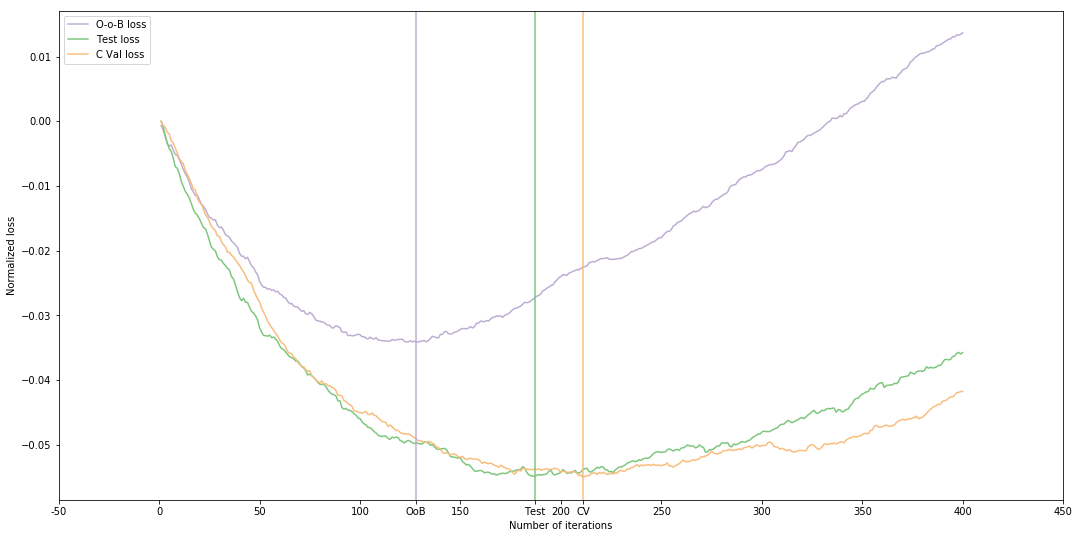

In [10]:
fig = plt.figure(figsize=(18, 9))
#### Plot curves and vertical lines for Best iterations
plt.plot(x, cumsum, label='O-o-B loss', color=oob_color)
plt.plot(x, test_score, label='Test loss', color=test_color)
plt.plot(x, cv_score, label='C Val loss', color=cv_color)
plt.axvline(x=oob_best_iter, color=oob_color)
plt.axvline(x=test_best_iter, color=test_color)
plt.axvline(x=cv_best_iter, color=cv_color)

#### Add three vertical lines to xticks for ['OoB', 'CV', 'Test']
xticks = plt.xticks()
xticks_pos = np.array(xticks[0].tolist() +
                      [oob_best_iter, cv_best_iter, test_best_iter])
xticks_label = np.array(list(map(lambda t: int(t), xticks[0])) +
                        ['OoB', 'CV', 'Test'])

ind = np.argsort(xticks_pos)
xticks_pos = xticks_pos[ind]
xticks_label = xticks_label[ind]
plt.xticks(xticks_pos, xticks_label)

plt.legend(loc='upper left')
plt.ylabel('Normalized loss')
plt.xlabel('Number of iterations')

plt.show()

## Part J - Save Graphics

In [11]:
imagepath = os.path.join(*[os.path.dirname(os.path.dirname(os.getcwd())),'Results','Chapter 05'])
print(imagepath)
if not os.path.exists(imagepath):
    os.makedirs(imagepath)
graphName = 'Chapter-005-Example-002-01.jpg'
imagename = os.path.join(*[os.path.dirname(os.path.dirname(os.getcwd())),'Results','Chapter 05',graphName])
fig.savefig(imagename, bbox_inches='tight')

C:\Users\AndreVermeulen\Documents\My Book\apress\Industrialized Machine Learning\book\IML\Results\Chapter 05


## Done

In [12]:
import datetime
now = datetime.datetime.now()
print('Done!',str(now))

Done! 2019-04-13 21:24:52.172984
